In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Salary_test_data

In [2]:
# #Mounting GoogleDrive
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
#Reading the file
# df = pd.read_csv("/content/drive/MyDrive/Datasets/SalaryData_test.csv")
Salary_test = pd.read_csv("SalaryData_Test.csv")
Salary_test.info()
Salary_test.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


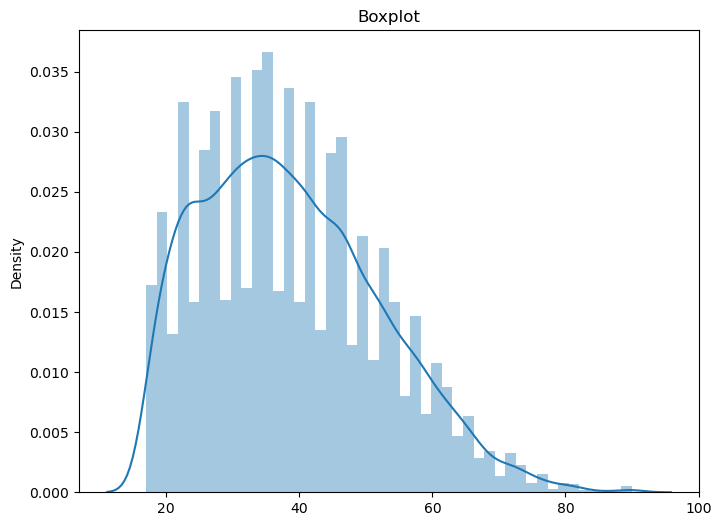

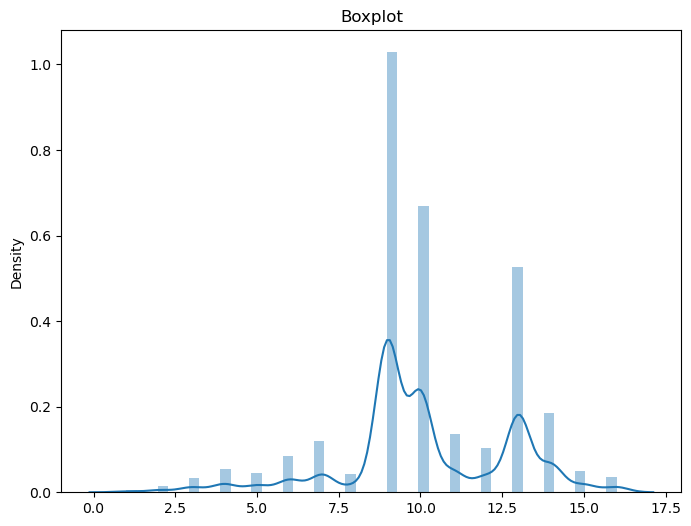

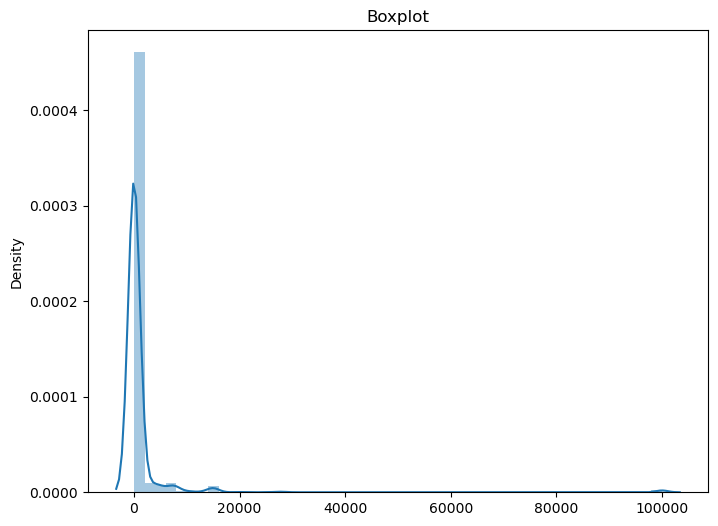

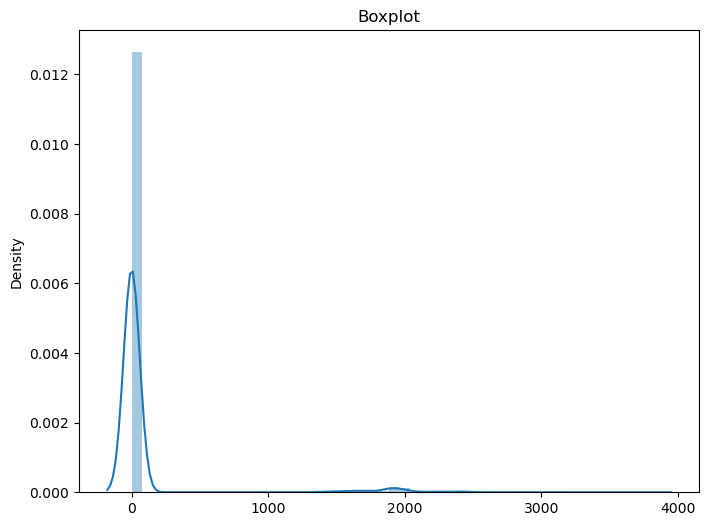

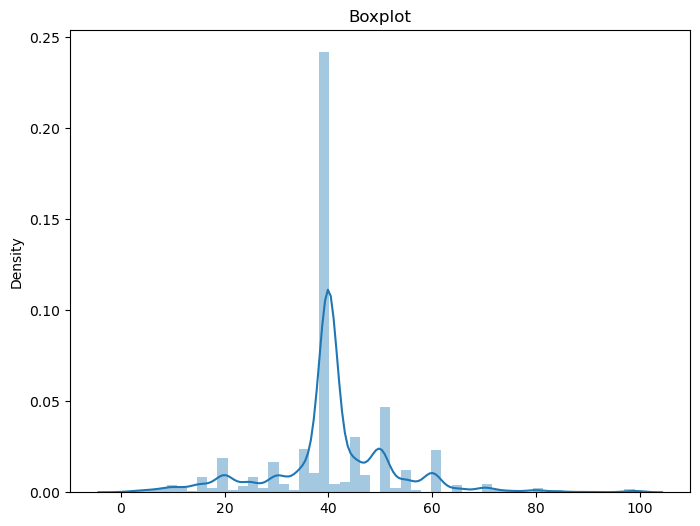

In [4]:
#EDA

data=['age','educationno','capitalgain',
       'capitalloss', 'hoursperweek']
for column in data:
  plt.figure(figsize=(8,6))
  sns.distplot(x=Salary_test[column])
  plt.title("Boxplot")
  plt.show()

In [5]:
Salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
Salary_test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


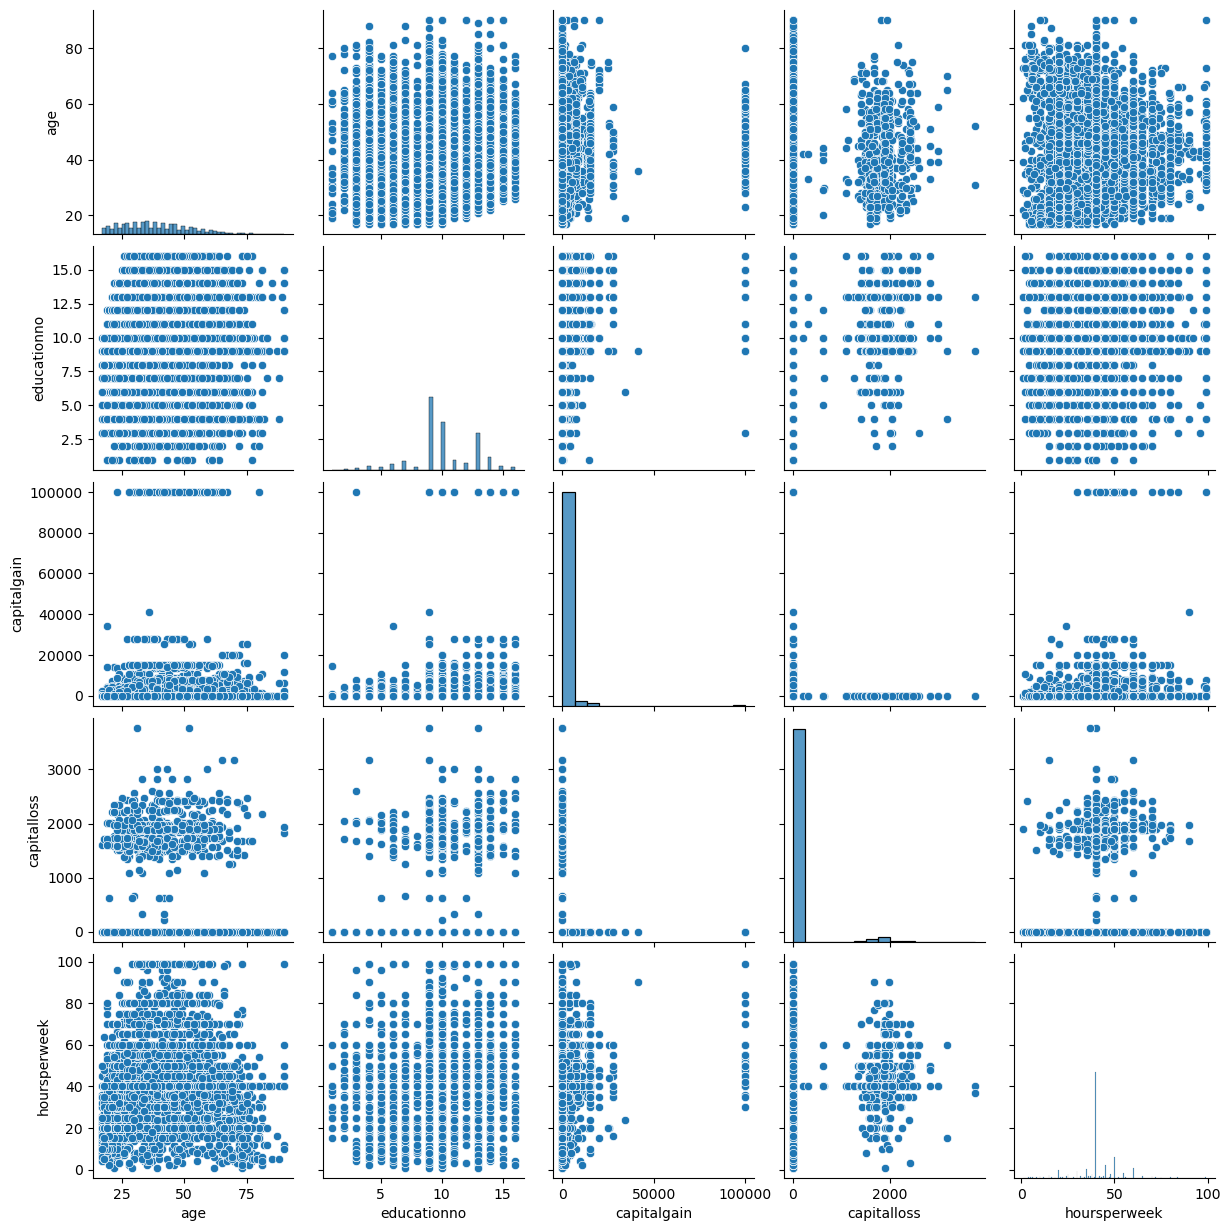

In [7]:
import seaborn as sns

sns.pairplot(Salary_test)


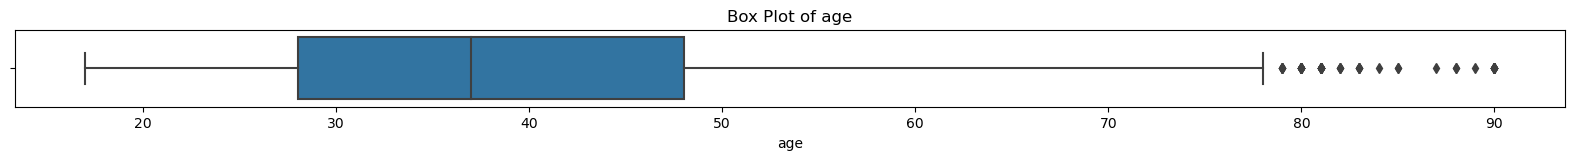

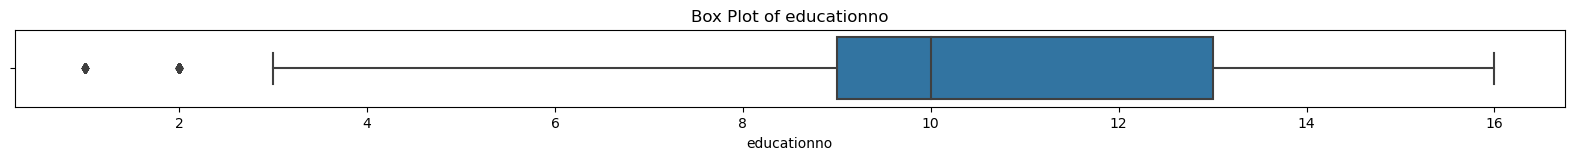

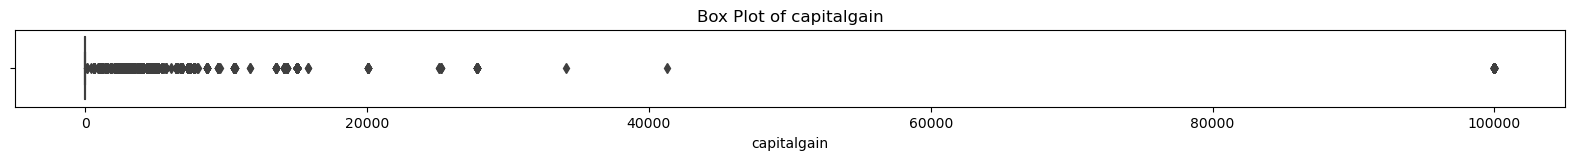

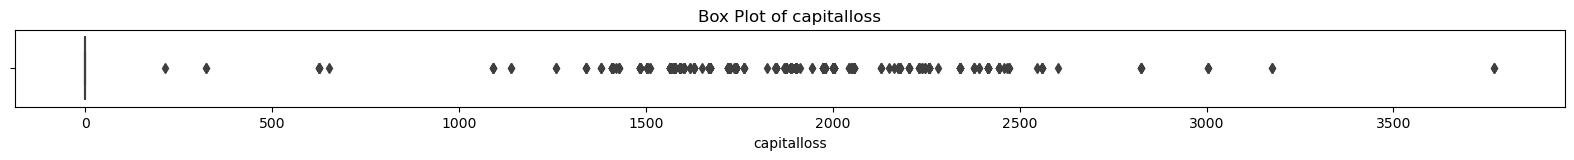

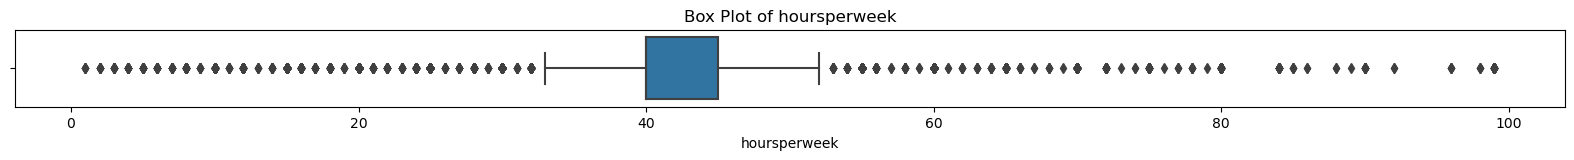

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_of_interest = [0, 3, 9, 10, 11]  # Adjust column indices as needed

for column in columns_of_interest:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=Salary_test.iloc[:, column])
    plt.title(f"Box Plot of {Salary_test.columns[column]}")
    plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
Salary_test['workclass'] = label_encoder.fit_transform(Salary_test['workclass'])
Salary_test['education'] = label_encoder.fit_transform(Salary_test['education'])
Salary_test['maritalstatus'] = label_encoder.fit_transform(Salary_test['maritalstatus'])
Salary_test['occupation'] = label_encoder.fit_transform(Salary_test['occupation'])
Salary_test['relationship'] = label_encoder.fit_transform(Salary_test['relationship'])
Salary_test['race'] = label_encoder.fit_transform(Salary_test['race'])
Salary_test['sex'] = label_encoder.fit_transform(Salary_test['sex'])
Salary_test['native'] = label_encoder.fit_transform(Salary_test['native'])
Salary_test['Salary'] = label_encoder.fit_transform(Salary_test['Salary'])



In [10]:
Salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [11]:
#Data Spliting(Train)
X_train = Salary_test.drop(columns=["Salary"])
Y_train = Salary_test[["Salary"]]

In [12]:
X_train.shape,Y_train.shape

((15060, 13), (15060, 1))

# Salary_train_data

In [13]:
Salary_train = pd.read_csv("SalaryData_Train.csv")
Salary_train.info()
Salary_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


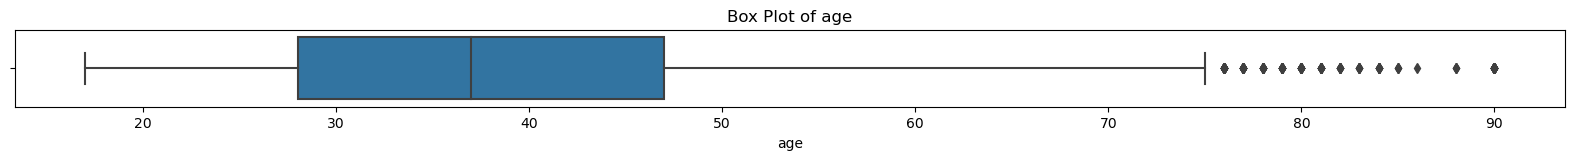

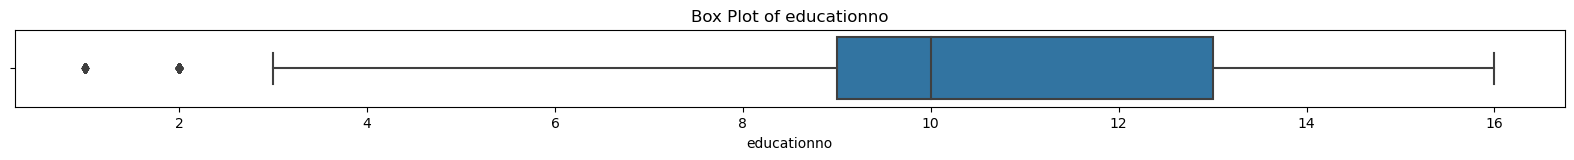

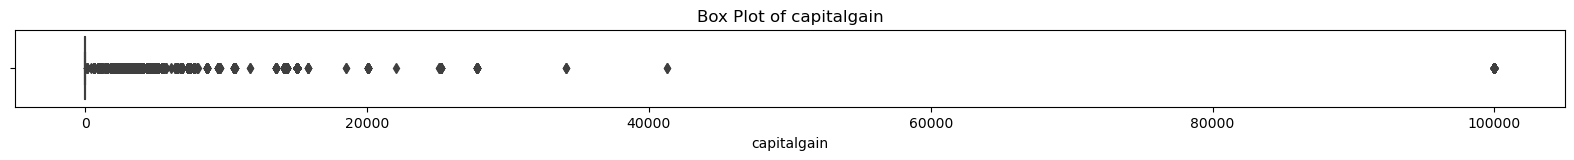

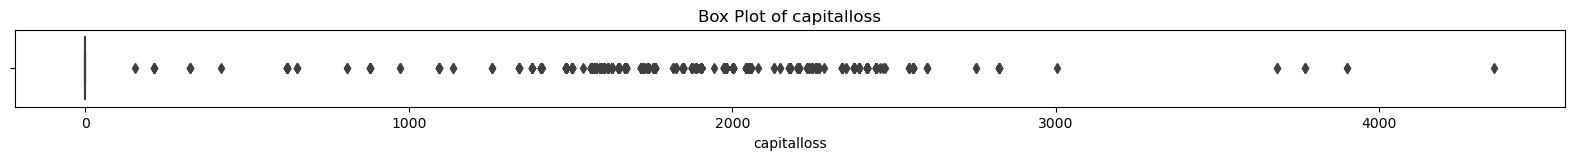

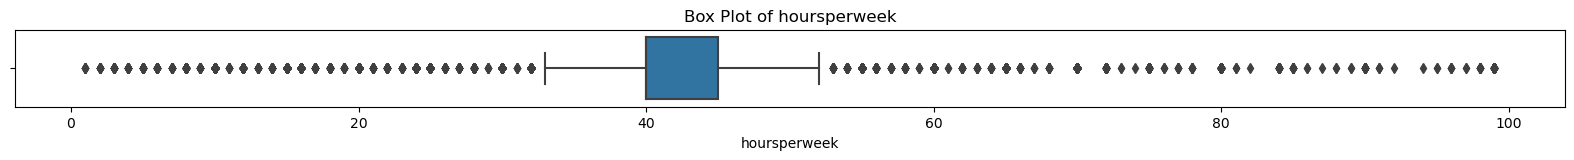

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_of_interest = [0, 3, 9, 10, 11]  # Adjust column indices as needed

for column in columns_of_interest:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=Salary_train.iloc[:, column])
    plt.title(f"Box Plot of {Salary_train.columns[column]}")
    plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
Salary_train['workclass'] = label_encoder.fit_transform(Salary_train['workclass'])
Salary_train['education'] = label_encoder.fit_transform(Salary_train['education'])
Salary_train['maritalstatus'] = label_encoder.fit_transform(Salary_train['maritalstatus'])
Salary_train['occupation'] = label_encoder.fit_transform(Salary_train['occupation'])
Salary_train['relationship'] = label_encoder.fit_transform(Salary_train['relationship'])
Salary_train['race'] = label_encoder.fit_transform(Salary_train['race'])
Salary_train['sex'] = label_encoder.fit_transform(Salary_train['sex'])
Salary_train['native'] = label_encoder.fit_transform(Salary_train['native'])
Salary_train['Salary'] = label_encoder.fit_transform(Salary_train['Salary'])

In [16]:
Salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


# X-test and Y-train split

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into training (80%) and testing (20%) subsets
X_train, X_test, Y_train, Y_test = train_test_split(
    Salary_train.iloc[:, 0:13],  # Features
    Salary_train["Salary"],      # Target variable
    test_size=0.2,               # 20% for testing, adjust as needed
    random_state=42              # Setting random state for reproducibility
)


In [18]:
X_train.shape,X_test.shape

((24128, 13), (6033, 13))

In [19]:
X_train = Salary_test.iloc[:,0:13]
Y_train = Salary_test["Salary"]

In [20]:
#Multinomial NB
# Preparing a Multinomial naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

MNB.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = MNB.predict(X_train)
Y_pred_test = MNB.predict(X_test)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.775
0.768


In [21]:
#Categorical NB

# Preparing a Categorical naive bayes model on training data set
from sklearn.naive_bayes import CategoricalNB

CNB = CategoricalNB()

CNB.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = CNB.predict(X_train)
Y_pred_test = CNB.predict(X_test)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.857
0.854


In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4490
           1       0.76      0.63      0.69      1543

    accuracy                           0.85      6033
   macro avg       0.82      0.78      0.80      6033
weighted avg       0.85      0.85      0.85      6033



In [23]:
from sklearn.naive_bayes import ComplementNB


complement_NB = ComplementNB()
complement_NB.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = complement_NB.predict(X_train)
Y_pred_test = complement_NB.predict(X_test)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print("Train:- ", training_accuracy)
print("Test:-",test_accuracy)


Train:-  0.775
Test:- 0.768


In [24]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_NB = BernoulliNB()
bernoulli_NB.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = bernoulli_NB.predict(X_train)
Y_pred_test = bernoulli_NB.predict(X_test)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print("Train:- ", training_accuracy)
print("Test:-",test_accuracy)


Train:-  0.73
Test:- 0.723


In [25]:
#Outliers
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = ['age', 'educationno',"capitalgain",'capitalloss','hoursperweek']
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = Salary_test.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[columns].quantile(0.25)
    Q3 = data_without_outliers[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[columns] >= lower_whisker_Length) & (data_without_outliers[columns]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df_test = data_without_outliers

       age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
6       24          2         15           10              4           7   
9       36          0          9           13              2           0   
...    ...        ...        ...          ...            ...         ...   
15053   25          2         11            9              4           7   
15054   48          1         12           14              0           7   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0            

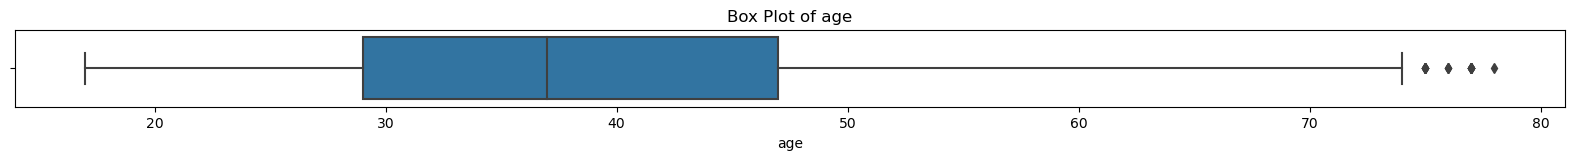

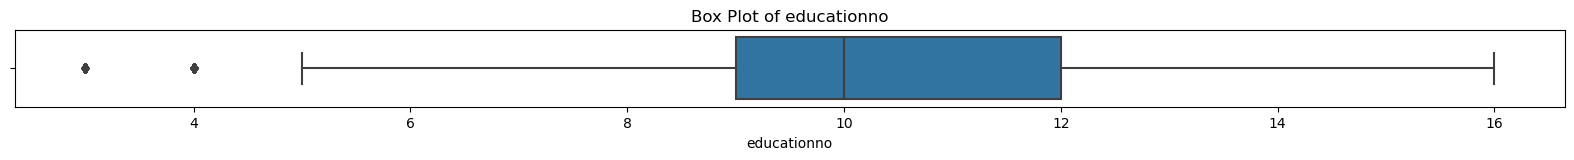

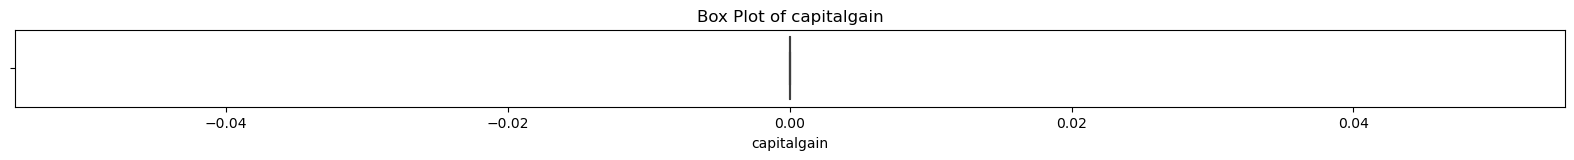

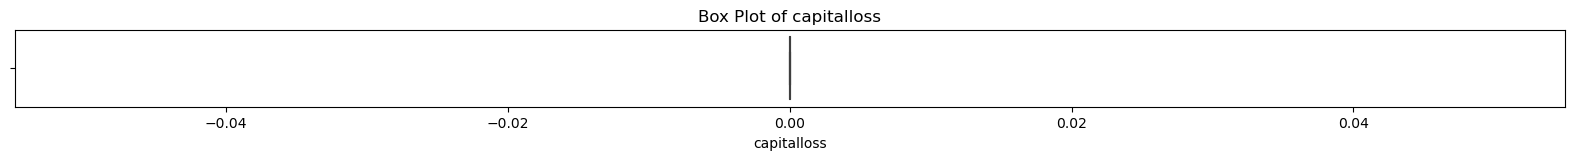

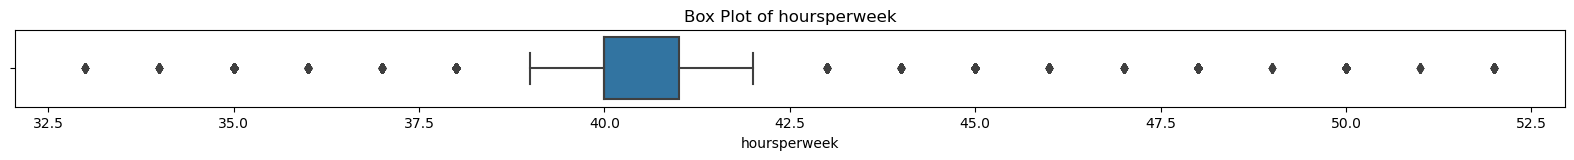

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_of_interest = [0, 3, 9, 10, 11]  # Adjust column indices as needed

for column in columns_of_interest:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=df_test.iloc[:, column])
    plt.title(f"Box Plot of {df_test.columns[column]}")
    plt.show()


In [27]:
#Outliers
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = ['age', 'educationno',"capitalgain",'capitalloss','hoursperweek']
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = Salary_train.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[columns].quantile(0.25)
    Q3 = data_without_outliers[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[columns] >= lower_whisker_Length) & (data_without_outliers[columns]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df_train = data_without_outliers

       age  workclass  education  educationno  maritalstatus  occupation  \
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
5       37          2         12           14              2           3   
7       52          4         11            9              2           3   
...    ...        ...        ...          ...            ...         ...   
30154   53          2         12           14              2           3   
30155   22          2         15           10              4          10   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
2            

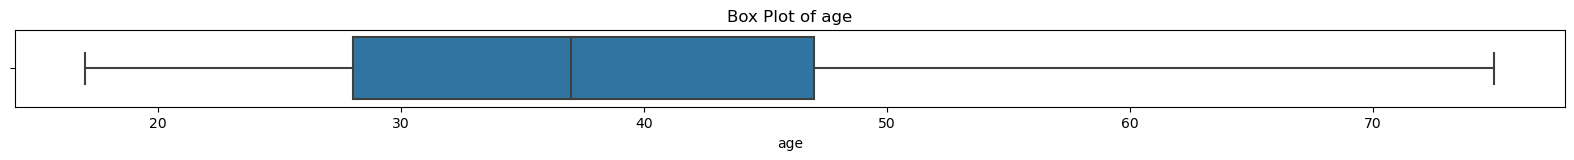

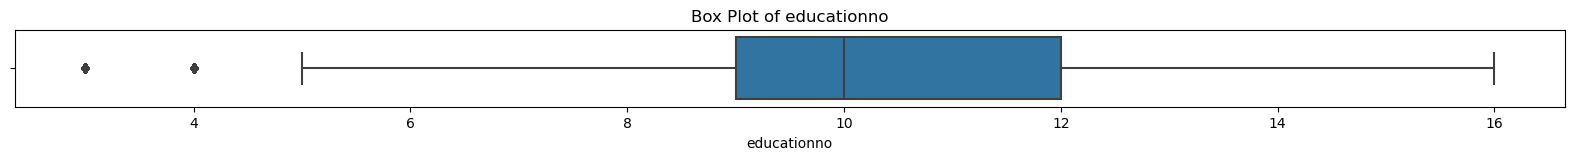

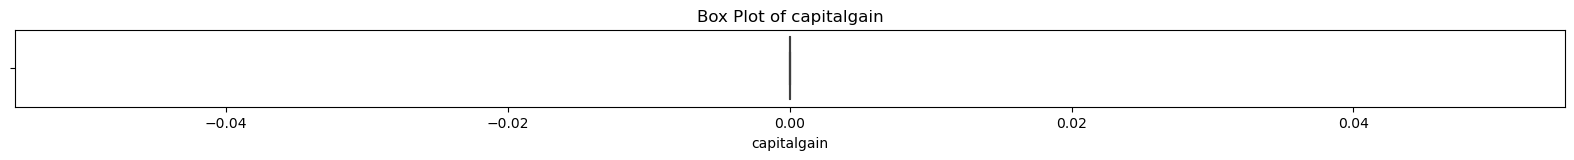

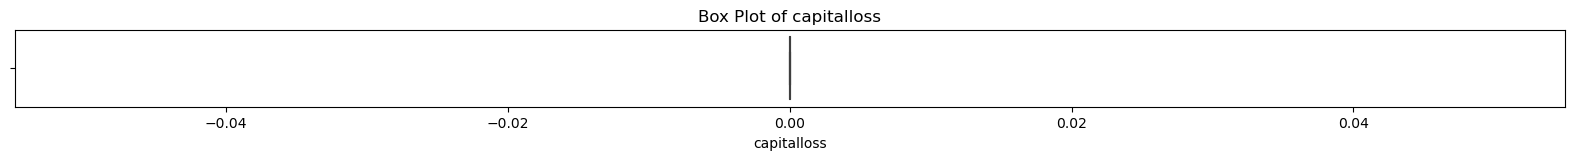

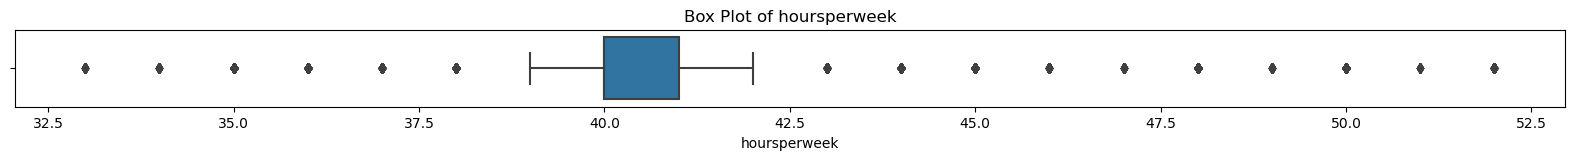

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_of_interest = [0, 3, 9, 10, 11]  # Adjust column indices as needed

for column in columns_of_interest:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=df_train.iloc[:, column])
    plt.title(f"Box Plot of {df_test.columns[column]}")
    plt.show()


In [29]:


from sklearn.model_selection import train_test_split

# Splitting the data into training (80%) and testing (20%) subsets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    df_test.iloc[:,0:13],  # Features
    df_test["Salary"],      # Target variable
    test_size=0.2,               # 20% for testing, adjust as needed
    random_state=42              # Setting random state for reproducibility
)


In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data into training (80%) and testing (20%) subsets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    df_train.iloc[:,0:13],  # Features
    df_train["Salary"],      # Target variable
    test_size=0.2,               # 20% for testing, adjust as needed
    random_state=42              # Setting random state for reproducibility
)


In [31]:
X_train1.shape,X_test1.shape

((15251, 13), (3813, 13))

In [32]:
#Multinomial NB
# Preparing a Multinomial naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

MNB.fit(X_train1,Y_train1) # Bo + b1x1 + B2x2
Y_pred_train = MNB.predict(X_train1)
Y_pred_test = MNB.predict(X_test1)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train1,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test1,Y_pred_test).round(3)

print("Train:- ", training_accuracy)
print("Test:-",test_accuracy)

Train:-  0.752
Test:- 0.74


In [33]:
#Gaussian NB

# Preparing a Gaussian naive bayes model on training data set
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(X_train1,Y_train1) # Bo + b1x1 + B2x2
Y_pred_train = GB.predict(X_train1)
Y_pred_test = GB.predict(X_test1)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train1,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test1,Y_pred_test).round(3)

print("Train:- ", training_accuracy)
print("Test:-",test_accuracy)

Train:-  0.788
Test:- 0.793


In [34]:
from sklearn.naive_bayes import MultinomialNB

# Initialize different Naive Bayes models
multinomial_NB = MultinomialNB()
MNB.fit(X_train1,Y_train1)
Y_pred_train = MNB.predict(X_train1)
Y_pred_test = MNB.predict(X_test1)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train1,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test1,Y_pred_test).round(3)

print("Train:- ", training_accuracy)
print("Test:-",test_accuracy)


Train:-  0.752
Test:- 0.74


In [35]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_NB = BernoulliNB()

bernoulli_NB.fit(X_train1,Y_train1) # Bo + b1x1 + B2x2
Y_pred_train = bernoulli_NB.predict(X_train1)
Y_pred_test = bernoulli_NB.predict(X_test1)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train1,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test1,Y_pred_test).round(3)

print("Train:- ", training_accuracy)
print("Test:-",test_accuracy)


Train:-  0.721
Test:- 0.713


In [36]:
from sklearn.naive_bayes import ComplementNB
complement_NB = ComplementNB()

complement_NB.fit(X_train1,Y_train1) # Bo + b1x1 + B2x2
Y_pred_train = complement_NB.predict(X_train1)
Y_pred_test = complement_NB.predict(X_test1)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train1,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test1,Y_pred_test).round(3)

print("Train:- ", training_accuracy)
print("Test:-",test_accuracy)


Train:-  0.662
Test:- 0.654


In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test1,Y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      3012
           1       0.35      0.79      0.49       801

    accuracy                           0.65      3813
   macro avg       0.64      0.70      0.61      3813
weighted avg       0.80      0.65      0.69      3813



In [38]:
#Categorical NB

# Preparing a Categorical naive bayes model on training data set
from sklearn.naive_bayes import CategoricalNB

CNB = CategoricalNB()

CNB.fit(X_train1,Y_train1) # Bo + b1x1 + B2x2
Y_pred_train = CNB.predict(X_train1)
Y_pred_test = CNB.predict(X_test1)

from sklearn.metrics import accuracy_score
# Model Accuracy on train set
training_accuracy = accuracy_score(Y_train1,Y_pred_train).round(3)
# Model Accuracy on test set
test_accuracy = accuracy_score(Y_test1,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.819
0.817


# Inference: Categorical Naive Bayes gives us better Accuracy which is about                                        85%.